# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

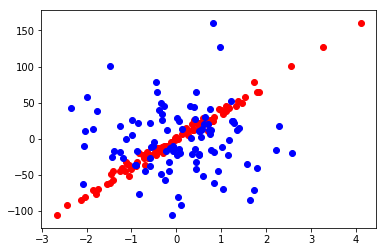

In [6]:
pylab.scatter(list(map(lambda x:x[0], data)), target, color = 'r')
pylab.scatter(list(map(lambda x:x[1], data)), target, color = 'b')

In [7]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [8]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [9]:
print (test_labels)

[  12.47089016  -18.86438755  -10.27758354  101.14760598   45.05465366
   12.42286854   24.82763821  -37.31870104   39.70663436  -14.97110322
   12.67156468   41.95683853   29.8208999     0.34799656  -16.65927231
   25.7124082   -16.79027112    4.45578287  -12.98848753   23.87701013
  -12.0017312   -63.4056294   -10.06708677   11.96165156  -13.99339669
   24.47584129  -91.477377     64.70214251   -0.74051877    1.72644759]


In [10]:
print (predictions)

[  2.02187126e+01  -1.85205055e+01  -7.41970779e+00   9.70888963e+01
   4.26116986e+01   6.97628141e+00   3.09380748e+01  -3.49152850e+01
   3.80705179e+01  -1.23831019e+01   1.43724821e+01   4.40171717e+01
   3.18763940e+01  -1.53361444e+00  -1.44070494e+01   2.83360443e+01
  -1.45543224e+01   9.35324388e+00  -1.62472942e+01   3.19111111e+01
  -6.79623096e+00  -6.01351518e+01  -9.60568585e+00   1.41298217e+01
  -1.47288758e+01   2.33129879e+01  -9.33975141e+01   6.84134798e+01
   1.06743532e+00   5.91758743e-02]


In [ ]:
metrics.mean_absolute_error(test_labels, predictions)

In [14]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779697, std: 1.0737104492890193


In [15]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [16]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779697, std: 1.0737104492890193


In [17]:
coef

array([ 38.07925837,   0.        ])

In [18]:
linear_regressor.coef_

array([ 38.32209382,   0.35129237])

In [19]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.131722524421229

In [22]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [23]:
print ("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.32*x1 + 0.35*x2 + -0.13


#### Lasso

In [24]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [25]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print ('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666397, std: 1.0170354384993354


In [ ]:
print lasso_regressor.coef_

In [26]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [27]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.60*x1 + 0.00*x2
